In [2]:
from google.colab.patches import cv2_imshow as imshow
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
import cv2 as cv
import urllib.request
import math

In [3]:
!gdown --id '1uJ0AS9wSpg1NMFCNliihIsynPj2oJSmX' -O citra.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uJ0AS9wSpg1NMFCNliihIsynPj2oJSmX
To: /content/citra.jpg
100% 57.2k/57.2k [00:00<00:00, 14.8MB/s]


In [4]:
def average(values):
  return sum(values)/len(values)

def plot(img):
  plt.rcParams['figure.figsize'] = [20, 5]
  plt.rcParams["figure.autolayout"] = True
  x = np.arange(0, 255, 5)
  plt.xticks(x)
  plt.hist(img.ravel(),256,[0,256])
  plt.ylim(0, 10000)
  plt.show()
  

def histogram(image):
  hist = {}
  for y in image:
    for x in y:
      if x in hist:
        hist[x] += 1
      else:
        hist[x] = 1
  return hist


def getMaxes(img, r):
  hist = histogram(img)
  histSorted = dict(sorted(hist.items(), key=lambda item: item[1], reverse=True))
  arr = []
  arr.append(list(histSorted)[0])

  for i in range(len(list(histSorted))):
    if not (int(arr[len(arr)-1]) - int(list(histSorted)[i]) >= -r and int(arr[len(arr)-1]) - int(list(histSorted)[i]) <= r):
      arr.append(list(histSorted)[i])
    if len(arr) == 6:
      break

  return arr


def getMins(img, r):
  hist = histogram(img)
  histSorted = dict(sorted(hist.items(), key=lambda item: item[1]))
  arr = []
  arr.append(list(histSorted)[0])

  for i in range(len(list(histSorted))):
    if not (int(arr[len(arr)-1]) - int(list(histSorted)[i]) >= -r and int(arr[len(arr)-1]) - int(list(histSorted)[i]) <= r):
      arr.append(list(histSorted)[i])
    # if len(arr) == 6:
      # break

  return arr

def getMinsV2(img, r):
  hist = histogram(img)
  histSorted = dict(sorted(hist.items(), key=lambda item: item[1]))
  listHist = list(histSorted)
  arr = []
  arr.append(listHist[0])

  for i in range(len(listHist)):
    add = True
    for j in range(len(arr)):
      if np.abs(int(arr[j]) - int(listHist[i])) < r:
        add = False
    if add:
      arr.append(listHist[i])

  return arr

def ambangAdaptif(img, ambang, i):
  arrLeft = []
  arrRight = []

  print('iteration:', i)

  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] < ambang:
        arrLeft.append(img[y,x])
      else:
        arrRight.append(img[y,x])

  avrLeft = math.ceil(average(arrLeft))
  avrRight = math.ceil(average(arrRight))

  print('avgLeft: ', avrLeft)
  print('avgRight: ', avrRight)

  T = math.ceil((avrLeft + avrRight)/2)

  print('T:', T)

  if T - ambang == 0:
    return T
  else:
    return ambangAdaptif(img, T, i+1)


def dwiAras(img, r):
  maxes = getMaxes(img, r)
  # mins = getMins(img, r)
  mins = getMinsV2(img, r)
  
  print('maxes: ', maxes)
  print('mins:', mins)

  range1, range2 = maxes[0], maxes[1]

  for min in mins:
    if (min > maxes[0] and min < maxes[1]) or (min < maxes[0] and min > maxes[1]):
      return min

  return 0


def convertBinary(img, ambang):

  binaryImg = np.zeros([img.shape[0], img.shape[1], 1], dtype=np.uint32)

  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      if img[y,x] < ambang:
        binaryImg[y,x] = 0
        # binaryImg[y,x] = 255
      else:
        binaryImg[y,x] = 255
        # binaryImg[y,x] = 0

  return binaryImg


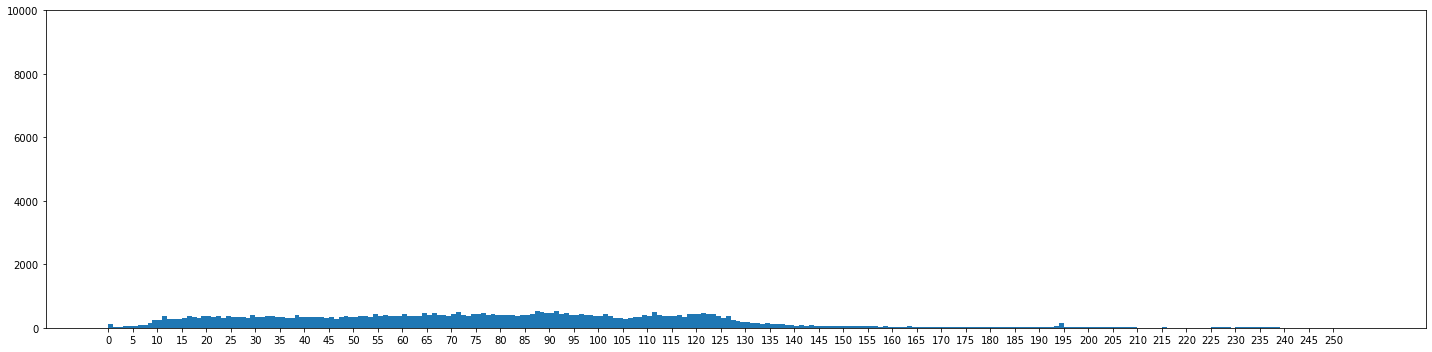

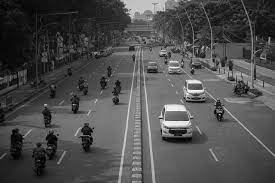

In [5]:
# img = cv.resize(img, (5, 5))                    # Resize image
# img = cv.imread('mona2.jpg', 0)
# plot(img)

# img = cv.imread('citra.jpg', 0)
# plot(img)

# img = cv.imread('anjing.jpg', 0)
# plot(img)

# img = cv.imread('mona.jpg', 0)
# plot(img)

# img = cv.imread('kita.jpg', 0)
# plot(img)

# img = cv.imread('rashad.jpeg', 0)
# plot(img)

img = cv.imread('jalan_raya.jpg', 0)
# plot(img)

# req = urllib.request.urlopen('https://www.siarandepok.com/data/uploads/2021/11/manfaat-daun-sirih-untuk-mata-benarkah-ampuh-1630575144.jpg')
# req = urllib.request.urlopen('https://images.k24klik.com/product/large/apotek_online_k24klik_20211127091106359225_BOTOL-KACA-100ML.jpg')
# req = urllib.request.urlopen('https://d2cbg94ubxgsnp.cloudfront.net/Pictures/2000xAny/4/0/8/132408_shutterstock_406445776.jpg')
# req = urllib.request.urlopen('https://img.freepik.com/free-photo/young-attractive-man-isolated-white-background_185193-76399.jpg?w=2000')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv.imdecode(arr, 0)

plot(img)

imshow(img)

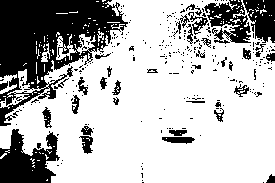

In [6]:
# manual
testing = convertBinary(img, 50)
imshow(testing)

iteration: 0
avgLeft:  6
avgRight:  79
T: 43
iteration: 1
avgLeft:  25
avgRight:  95
T: 60
iteration: 2
avgLeft:  34
avgRight:  103
T: 69
iteration: 3
avgLeft:  39
avgRight:  108
T: 74
iteration: 4
avgLeft:  42
avgRight:  111
T: 77
iteration: 5
avgLeft:  44
avgRight:  112
T: 78
iteration: 6
avgLeft:  44
avgRight:  113
T: 79
iteration: 7
avgLeft:  45
avgRight:  114
T: 80
iteration: 8
avgLeft:  45
avgRight:  114
T: 80


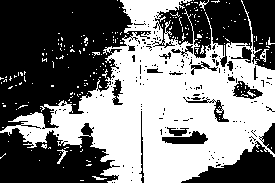

In [7]:
# adaptive
ambang = ambangAdaptif(img, 10, 0)
img2 = convertBinary(img, ambang)
imshow(img2)


maxes:  [91, 111, 88, 71, 90, 76]
mins: [252, 218, 240, 229, 206, 187, 173, 1, 162, 152, 140, 129, 12, 46, 105, 28, 117, 61, 73, 83, 94]
105


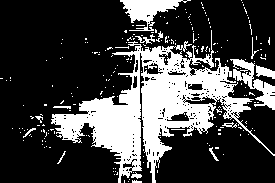

In [8]:
# dwi aras
threshold = dwiAras(img, 10)
print(threshold)
imgA = convertBinary(img, threshold)
imshow(imgA)

In [9]:
# testing

listHist = [3, 8, 93, 13]
arr = []
arr.append(listHist[0])
r = 10

for i in range(len(listHist)):
  add = True
  for j in range(len(arr)):
    if np.abs(int(arr[j]) - int(listHist[i])) < r:
      add = False
    print(np.abs(int(arr[j]) - int(listHist[i])))
  print('mins: ', arr)
  print('list: ', listHist[i])
  if add:
    arr.append(listHist[i])
  print()

print(listHist)
print(arr)

0
mins:  [3]
list:  3

5
mins:  [3]
list:  8

90
mins:  [3]
list:  93

10
80
mins:  [3, 93]
list:  13

[3, 8, 93, 13]
[3, 93, 13]
